In [1]:
import numpy as np
import funcarray as fa

def numpy_ref(N, x, y):
    """ Numpy reference for initializing and summing over all elements. """
    a = np.outer(x[:N], y[:N])
    return a.sum()

def fun(i,j, x, y):
    return x[i]*y[j]

def class_test(N, x, y):
    a = fa.array((N, N), fun, x[:N], y[:N])
    return a.sum()

In [2]:
from timeit import repeat
from numpy.random import default_rng

N = [10, 100, 1000]
rnd = default_rng()
x = rnd.random(N[-1], dtype='f8')
y = rnd.random(N[-1], dtype='f8')

In [3]:
# Ensure same result
for n in N:
    assert np.abs((numpy_ref(n, x, y) - class_test(n, x, y)) / numpy_ref(n, x, y)) < 1e-9

In [4]:
# Numpy reference 
np_ref = [None]*len(N)
for i, n in enumerate(N):
    np_ref[i] = np.array(repeat("numpy_ref({}, x, y)".format(n), 
                                setup="from __main__ import numpy_ref, x, y",
                                number=5, repeat=5)) / 5

In [5]:
# With function array
func = [None]*len(N)
for i, n in enumerate(N):
    func[i] = np.array(repeat("class_test({}, x, y)".format(n), 
                              setup="from __main__ import class_test, x, y",
                              number=5, repeat=5)) / 5

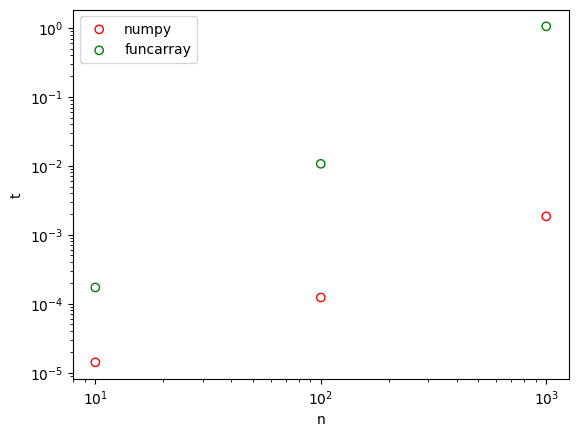

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(N, np.mean(np_ref, axis=1), marker='o', facecolor='None', edgecolor='r', label='numpy')
ax.scatter(N, np.mean(func, axis=1), marker='o', facecolor='None', edgecolor='g', label='funcarray')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('n')
ax.set_ylabel('t')
plt.legend()

plt.show()